Name: Jorge Moreno  
Project Name: Movie4Me?  
Description: Different Recommendation systems using Movie data  
Link to data source: https://grouplens.org/datasets/movielens/  
Note: I will be using the ml-latest-small file for this notebook.  ml-latest-small:
    100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. Last updated 9/2018.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

# Data Importing 

In [2]:
#Make sure to unzip the file.
links = pd.read_csv("data/ml-latest-small/links.csv");
movies = pd.read_csv("data/ml-latest-small/movies.csv");
ratings = pd.read_csv("data/ml-latest-small/ratings.csv");
tags = pd.read_csv("data/ml-latest-small/tags.csv");

# Data Visualization/Exploration

<b> Description</b>: For each dataframe, I wanted to check what columns each dataframe had, what kind of data each column had, and finaly see the uniqueness of columns I thought where important. These where genres, tags, and ratings. 

In [3]:
print("Columns for links.csv: {}".format(list(links.columns)))
print("Columns for movies.csv: {}".format(list(movies.columns)))
print("Columns for ratings.csv: {}".format(list(ratings.columns)))
print("Columns for tags.csv: {}".format(list(tags.columns)))

Columns for links.csv: ['movieId', 'imdbId', 'tmdbId']
Columns for movies.csv: ['movieId', 'title', 'genres']
Columns for ratings.csv: ['userId', 'movieId', 'rating', 'timestamp']
Columns for tags.csv: ['userId', 'movieId', 'tag', 'timestamp']


In [4]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [8]:
'''
checking out movies.csv stuff
Movie titles are entered manually or imported from 
<https://www.themoviedb.org/>, and include the year of release 
in parentheses. Errors and inconsistencies may exist in these titles.
'''
#Checking the number of unique Genres
#movies['genres'].unique()
uniqueGenres = set()
#checking out how many unique gengres there are. Movies can fall under multiple so we need to split them
for row in movies.itertuples():
    tempGenres = row.genres
    splitGenres = tempGenres.split("|")
    for genre in splitGenres:
        uniqueGenres.add(genre)
print(len(uniqueGenres))
print(uniqueGenres)

20
{'Adventure', 'Fantasy', 'Thriller', 'Drama', 'Horror', 'IMAX', '(no genres listed)', 'Comedy', 'War', 'Animation', 'Romance', 'Film-Noir', 'Children', 'Musical', 'Mystery', 'Crime', 'Western', 'Action', 'Sci-Fi', 'Documentary'}


In [9]:
'''
checking out tags.csv stuff
'''
uniqueTags = set ()
print("")
for row in tags.itertuples():
    tempTags = row.tag
    uniqueTags.add(tempTags)
print(len(uniqueTags))
print(uniqueTags)


1589
{'multiple short stories', 'bromance', 'golf', 'soccer', 'PTSD', 'pigs', 'Neil Patrick Harris', 'poor dialogue', 'lovely', 'allegorical', 'Tilda Swinton', 'sexuality', 'really bad', 'Casey Affleck', 'robbery', 'Woody Harrelson', 'stop looking at me swan', 'Ralph Fiennes', 'small towns', 'romance', 'survival', '1900s', 'Will Ferrell', 'E.M. Forster', 'memory loss', 'wedding', 'bible', 'Clock', 'AS Byatt', 'tragic', 'great dialogue', 'apes', 'self discovery', 'episodic', 'british comedy', 'American Indians', 'aviation', 'bad acting', 'Tolstoy', 'food', 'Thrilling', 'Bruce Willis', 'Gulf War', 'cheating', 'Disaster', 'Chris Evans', 'nightclub', 'Thanos', 'truth', 'r:some violence', 'visually stunning', 'Suspense', 'new composer', 'magic board game', 'scenic', 'Arthur C. Clarke', 'amazing', 'too much love interest', 'a dingo ate my baby', 'schizophrenia', 'Quakers', 'ex-con', 'Simple', 'captain nemo', 'Howard Hughes', 'quotable', 'Michigan', 'Margot Robbie', 'pudding', 'gunfight', 'A

In [10]:
'''
checking out ratings.csv stuff
'''
uniqueRatings = set()
#checking out what kind of ratings there are
for row in ratings.itertuples():
    rating = row.rating
    uniqueRatings.add(rating)
print (uniqueRatings)



{0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 4.5, 3.5, 2.5, 1.5}


# Data Modifcation Tests

<b> Description: </b> After checking the information for the dataframes and understanding the columns I wanted to test, I decided to merge some of these dataframes. I wanted the ultimate dataframe that would have relevant information.

Step 1) I had to merge.

  * merging movies and rating on movieId to get title associated to id
  * merging movies and Tags on movieId to get title associated to id

In [11]:
movieRatings= pd.merge(movies,ratings, on ='movieId')
movieTags = pd.merge(movies, tags, on= 'movieId')
movieRatings.head()


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [12]:
movieTags.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


Step 2) Filter/Clean the data
  * Group movieRatings on movieID and title.
    - Also had to get the mean rating for each movie since multiple users had ratings for the same movies.
  * Group moveTags by userID MovieID and title.
    - Also had to append all tags to one column. A user could have multiple rows with different tags on the movie

In [13]:
#Grabbing the average rating for a movie. Grouping it by title and movieId
#this will remove userId and Timestamp
betterMovieRatings =pd.DataFrame(movieRatings.groupby(['movieId','title'])['rating'].mean())

#grouping by userID movieID and title. We are also appending all tags the user has on this movie
#because a user can have mutliple tags on a movie
cleanTags = movieTags.groupby(['userId','movieId','title'], as_index = False).agg({ 'tag': (lambda tags: ','.join(tags))})
betterMovieRatings.head()



,,rating
movieId,title,
1,Toy Story (1995),3.920930
2,Jumanji (1995),3.431818
3,Grumpier Old Men (1995),3.259615
4,Waiting to Exhale (1995),2.357143
5,Father of the Bride Part II (1995),3.071429


In [14]:
#Testing to make sure user have one row for each movie. All tags for that movie in one tag. 
cleanTags.loc[cleanTags['title'] == 'Step Brothers (2008)']

,userId,movieId,title,tag
0,2,60756,Step Brothers (2008),"funny,Highly quotable,will ferrell"
51,62,60756,Step Brothers (2008),"comedy,funny,will ferrell"
269,424,60756,Step Brothers (2008),"funny,will ferrell"


In [15]:
cleanTags.head()

,userId,movieId,title,tag
0,2,60756,Step Brothers (2008),"funny,Highly quotable,will ferrell"
1,2,89774,Warrior (2011),"Boxing story,MMA,Tom Hardy"
2,2,106782,"Wolf of Wall Street, The (2013)","drugs,Leonardo DiCaprio,Martin Scorsese"
3,7,48516,"Departed, The (2006)",way too long
4,18,431,Carlito's Way (1993),"Al Pacino,gangster,mafia"


Step 3) Merge

  * Merge the two dataframes created on movieID. 
    - Each row should be a user, with a movie, all the tags he had on that movie, and the average rating

In [16]:
moveTagRating = pd.merge(cleanTags,betterMovieRatings, on= 'movieId')
moveTagRating.head()

,userId,movieId,title,tag,rating
0,2,60756,Step Brothers (2008),"funny,Highly quotable,will ferrell",3.553571
1,62,60756,Step Brothers (2008),"comedy,funny,will ferrell",3.553571
2,424,60756,Step Brothers (2008),"funny,will ferrell",3.553571
3,2,89774,Warrior (2011),"Boxing story,MMA,Tom Hardy",3.727273
4,2,106782,"Wolf of Wall Street, The (2013)","drugs,Leonardo DiCaprio,Martin Scorsese",3.916667


In [17]:
#Testing to make sure user and song have one row for each movie.
#They should also have same rating. 
moveTagRating.loc[moveTagRating['title'] == 'Step Brothers (2008)']

,userId,movieId,title,tag,rating
0,2,60756,Step Brothers (2008),"funny,Highly quotable,will ferrell",3.553571
1,62,60756,Step Brothers (2008),"comedy,funny,will ferrell",3.553571
2,424,60756,Step Brothers (2008),"funny,will ferrell",3.553571


# Simple Item Similarity  Recommender

<b>Description: </b> The goal for this recommender was to make a recommender system based on two movies the user selected within the data. To do so we will need to get avg ratings, number of ratings for movie, correlation between the 2 selected movies below and all other movies. During the process, I also showed the dataframes and some graphs for visual help. I also used some of the techniques from the data modification tests.

In [18]:
movieRatings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


Step 1)
  * Get Mean of ratings and # of ratings per movie

In [19]:
#getting average rating per movie. Grouping them by title and getting mean.
avgratings = pd.DataFrame(movieRatings.groupby('title')['rating'].mean())
#getting the # of ratings a movie has as well. making a new column for this.
avgratings['#OfRatings'] = movieRatings.groupby('title')['rating'].count()
avgratings.head()

,rating,#OfRatings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [20]:
tempholder1 = avgratings['rating']
tempholder2 = avgratings['#OfRatings']

Step 2) Visualize 
  * Making some plots to visualize data
    - The left Plot shows the number of times a certain rating occured throughout the movies. So for ratings around 4, there where roughly 1150 4 star ratings.
    - The right plot shows the amout of ratings a movie had. So on the lower end, we can see there are a lot of movies with 1 rating. around 6700.
    - The third graph shows us that there is a positivle correlation when it comes to the number of ratings a movie has and the avg rating it gets. The more ratings it gets, the more positive a movie seems to be. 

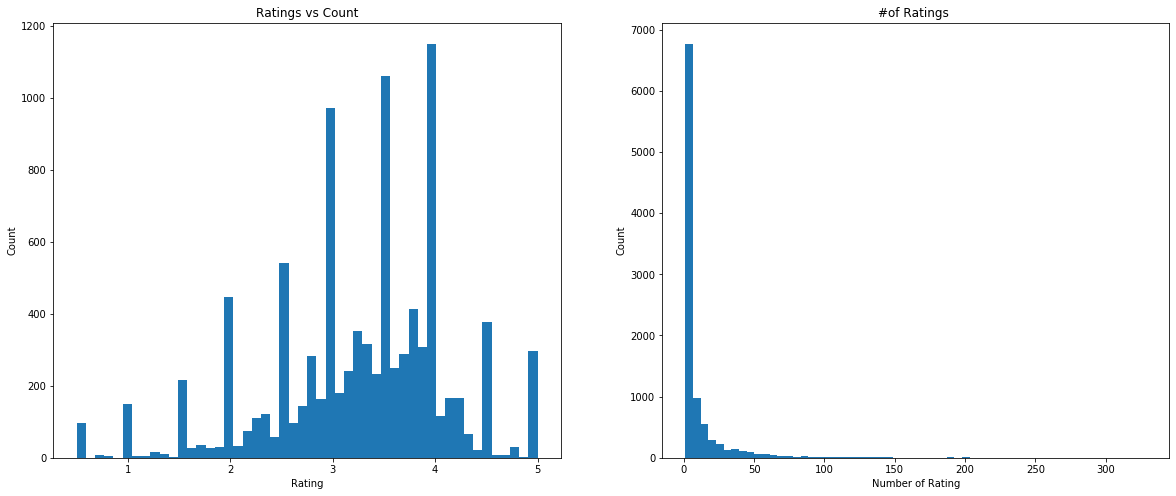

In [21]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20, 8))
ax0.hist(tempholder1,50)
ax0.set_title('Ratings vs Count')
ax0.set_ylabel("Count")
ax0.set_xlabel("Rating")
ax1.hist(tempholder2,60)
ax1.set_title("#of Ratings ")
ax1.set_ylabel("Count")
ax1.set_xlabel("Number of Rating")
plt.show()

/home/user/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/user/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


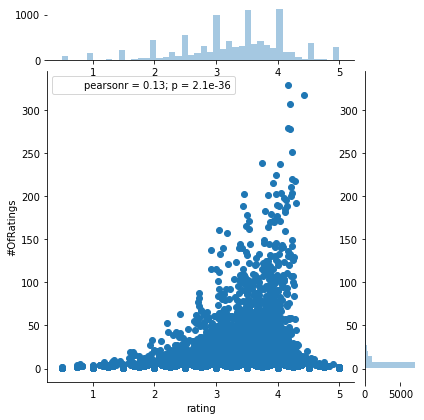

In [22]:
sns.jointplot(x='rating', y='#OfRatings', data=avgratings)

step 3) Make dataframe with user and movie info and what they scored it
  * Making a dataframe with the user ratings for a movie
  * Index should be userIds while the columns should be all movies. Info in these columns come from the user rating if they rated it. 

In [23]:
#making a dataframe with a users rating for a movie. 
movie_matrix = movieRatings.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


step 4) Select two movies and create correlation to all other movies within data
  * Movies chosen where : GO BACK
  * Testing movie 1 and movie 2 with each other. Should be printing same values

In [24]:
#two movies chosen
movie1 = movie_matrix['Air Force One (1997)']
movie2 = movie_matrix['Contact (1997)']

#getting correlations of all other movies in respect to the movies chosen
similar_to_movie1=movie_matrix.corrwith(movie1)
similar_to_movie2 = movie_matrix.corrwith(movie2)

#should be similar
print(similar_to_movie1['Contact (1997)'])
print(similar_to_movie2['Air Force One (1997)'])

/home/user/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/user/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


0.46845514589654386
0.4684551458965438


Step 5) Creating dataframe with correlation column grabbed above for each selected movie

In [25]:
#grabing the old dataframe and renaming column to correlation
corr_movie1 = pd.DataFrame(similar_to_movie1, columns=['correlation'])
corr_movie2 = pd.DataFrame(similar_to_movie2, columns=['Correlation'])


#dropping any moviewith NaN values. 
corr_movie2.dropna(inplace=True)
corr_movie1.dropna(inplace=True)

#joining #ofRatings into dataframes
corr_movie1 = corr_movie1.join(avgratings['#OfRatings'])
corr_movie2 = corr_movie2.join(avgratings['#OfRatings'])


corr_movie2.head()


,Correlation,#OfRatings
title,,
"'burbs, The (1989)",0.486761,17
(500) Days of Summer (2009),0.634064,42
*batteries not included (1987),0.868599,7
...And Justice for All (1979),1.000000,3
10 Things I Hate About You (1999),-0.102640,54


In [26]:
corr_movie1.head()

,correlation,#OfRatings
title,,
"'burbs, The (1989)",0.168459,17
(500) Days of Summer (2009),0.086874,42
*batteries not included (1987),-0.866025,7
10 Cloverfield Lane (2016),0.192450,14
10 Items or Less (2006),-1.000000,3


Step 6) Setting boundaries for recommended movies.
  * Since there are a lot of movies that had very few ratings from unique users, we only want those that had over 100 ratings.
  * Graph from above helped decide figure this out
  * dataframe shows top 5 movies correlated to the movies selected

In [27]:
#only show movies that have more than 100 ratings per . This is where the svc was helpful
#top 5 movies that are similar to that of movie 1
corr_movie1[corr_movie1['#OfRatings'] > 100].sort_values(by='correlation', ascending=False).head()

,correlation,#OfRatings
title,,
Clear and Present Danger (1994),0.698836,110
"Net, The (1995)",0.598322,112
"Green Mile, The (1999)",0.574799,111
"Firm, The (1993)",0.561304,101
"Departed, The (2006)",0.543279,107


In [28]:
#only show movies that have more than 100 ratings per . This is where the svc was helpful
#top 5 movies that are similar to that of movie 2
corr_movie2[corr_movie2['#OfRatings'] > 100].sort_values(by='Correlation', ascending=False).head()

,Correlation,#OfRatings
title,,
Sleepless in Seattle (1993),0.689602,106
American Pie (1999),0.670109,103
Clear and Present Danger (1994),0.641203,110
"Firm, The (1993)",0.640332,101
"Bourne Identity, The (2002)",0.639769,112


# Cosine User Similarity

<b>Description:</b> The goal for this test was to implement the Cosine Similarity Matrix in order to get a user-user similarity matrix. I did so by following the slides from class and equation for a user similarity matrix

Step 1) Copy movie_matrix from above

In [29]:
cosine_matrix2 = movie_matrix #making a copy so we dont mess with the original one above
cosine_matrix2.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


$$
cos(a,b) = \frac{A \cdot B} {||a||||b||}  \frac{\sum_{i} a_i * b_i} {\sqrt{\sum_i a^2_i} * \sqrt{\sum_i b^2_i}}
$$

Step 2) Get mean from each row and subtract it from values for each data in row.
  * Keep NaN values while getting mean
    - 0s would effect the mean. Set Nan to zero after grabbing means 

In [30]:
mean = cosine_matrix2.mean(axis = 1) #grabing mean of each row

#https://stackoverflow.com/questions/26081300/pandas-subtract-row-mean-from-each-element-in-row
cosine_matrix2 = cosine_matrix2.sub(mean,axis= 0)#subtracting each value of row with the mean of the row

#set to 0 after mean calc so it doesnt effect calculations
cosine_matrix2 = cosine_matrix2.fillna(0)
cosine_matrix2.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.366379,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Step 3) Follow equation from above and similarity equation from slide to get similarity matrix.

In [31]:
#following the above markdown
topPart = np.dot(cosine_matrix2.values, cosine_matrix2.values.T)

bottomLeftPart = np.linalg.norm(cosine_matrix2.values, axis = 1)
bottomRightPart = np.linalg.norm(cosine_matrix2.values.T, axis = 0)

#Compute the outer product of two vectors. 
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.outer.html
bottomPart = np.outer(bottomLeftPart,bottomRightPart)

cosine_Distance = topPart / bottomPart

#using the similiarity equation from slides
cosine = .5 + (.5*cosine_Distance)

cosineSimiliarityMatrix = pd.DataFrame(data= cosine, columns = cosine_matrix2.index, index = cosine_matrix2.index)

cosineSimiliarityMatrix.head()


/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.500632,0.500276,0.524209,0.510923,0.477251,0.496900,0.523506,0.509755,0.495623,...,0.509063,0.491414,0.492390,0.481471,0.485439,0.506008,0.527631,0.537612,0.487144,0.505466
2,0.500632,1.000000,0.500000,0.491418,0.510898,0.489474,0.494443,0.475957,0.500000,0.501506,...,0.474724,0.484210,0.499156,0.500000,0.500000,0.503113,0.489748,0.497000,0.469955,0.512500
3,0.500276,0.500000,1.000000,0.494370,0.484231,0.502400,0.500000,0.483764,0.500000,0.500000,...,0.497548,0.491941,0.508874,0.500000,0.499285,0.481356,0.496105,0.493500,0.500000,0.509775
4,0.524209,0.491418,0.494370,1.000000,0.485190,0.506978,0.529046,0.501032,0.497063,0.525795,...,0.481156,0.531561,0.513820,0.493109,0.520019,0.510295,0.507314,0.481215,0.491058,0.499503
5,0.510923,0.510898,0.484231,0.485190,1.000000,0.504556,0.505059,0.493858,0.500000,0.483417,...,0.507982,0.506213,0.513538,0.506231,0.481864,0.513160,0.515948,0.499124,0.546914,0.499861


Step 4) Get the max correlated user for each user that is not themselves.
  * Done by settings diagonals to 0, grabbing the max correlation and index.

In [32]:
#getting max correlation value and user id for each person. Need to make diagonals = 0. 
np.fill_diagonal(cosineSimiliarityMatrix.values, 0)
dfCosUser = pd.DataFrame(cosineSimiliarityMatrix.idxmax(axis=1), index=cosineSimiliarityMatrix.index, columns=['user2Id'])
dfMaxCosUserCorr= pd.DataFrame(cosineSimiliarityMatrix.max(), index=cosineSimiliarityMatrix.index, columns=['userCorr'])
dfmaxCosUser = pd.merge(dfCosUser,dfMaxCosUserCorr , on='userId')
dfmaxCosUser.head()

,user2Id,userCorr
userId,,
1,301,0.562400
2,189,0.567338
3,441,0.558709
4,75,0.558205
5,145,0.687316


# Jaccard Similarity

<b>Description:</b> The goal for the Jaccardian Similarity was similar to that of the Cosine. I wanted to see the similarities between user-user as well as movie-movie. Since Jaccardian is a boolean style matrix, we had to transorm our data into a good, bad type of matrix. This was done by making ratings equal to or higher than 3 good (1) and anything else 0. I then followed the jaccardian similarity equation to get each similarity in respect to the matrix I was displaing. user to user and item to item.

Step 1) copy movie_matrix

In [33]:
jaccard_Matrix = movie_matrix #making a copy so we dont mess with the original one above
jaccard_Matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


$$
    Jaccard(a,b) = \frac {|U_a \cap U_b |}{  |U_a \cup U_b |}
$$

Step 2) Set values to 0 or 1 depending on ratings.
  * Had to set NaN values to 0 first

In [34]:
# Ratings higher or equal to 3 are good (1) else (0) bad
jaccard_Matrix = jaccard_Matrix.fillna(0)# Set any nonzero value to 1
jaccard_Matrix = jaccard_Matrix.where(lambda x: x>=3,0 ) # setting values = 0 when original value is less than 3
jaccard_Matrix = jaccard_Matrix.where(lambda x: x<3,1)  #setting values = 1 when origianl valu is more than 3
jaccard_Matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Step 3) Calculating Jaccardian matrix using helper function from import

In [35]:
#https://stackoverflow.com/questions/37003272/how-to-compute-jaccard-similarity-from-a-pandas-dataframe
# Calculating Jaccardian Similarities betwen users
jac_sim = 1 - pairwise_distances(jaccard_Matrix.values, metric = "hamming")
jac_sim = pd.DataFrame(data = jac_sim, index=jaccard_Matrix.index, columns=jaccard_Matrix.index)
jac_sim.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.974380,0.975512,0.966149,0.975100,0.952876,0.970779,0.975203,0.974277,0.965840,...,0.968618,0.969750,0.915012,0.969338,0.963988,0.889186,0.969956,0.937751,0.974792,0.871489
2,0.974380,1.000000,0.995370,0.980039,0.993312,0.967383,0.986727,0.993003,0.993724,0.986521,...,0.989094,0.985287,0.917996,0.987344,0.978702,0.896286,0.979525,0.939294,0.993621,0.881469
3,0.975512,0.995370,1.000000,0.980965,0.994032,0.967898,0.987447,0.993724,0.994650,0.986830,...,0.987756,0.986007,0.918922,0.988270,0.979833,0.896389,0.980451,0.939191,0.994341,0.879720
4,0.966149,0.980039,0.980965,1.000000,0.980759,0.956065,0.974997,0.979216,0.979525,0.972322,...,0.974071,0.973557,0.922523,0.973969,0.966972,0.895462,0.969030,0.931680,0.979422,0.871798
5,0.975100,0.993312,0.994032,0.980759,1.000000,0.971602,0.986624,0.994753,0.992386,0.984978,...,0.986315,0.988682,0.919951,0.989299,0.979628,0.898035,0.980451,0.940220,0.994135,0.879309


Step 4) Grab max correlation in respect to user-user 

In [36]:
#getting max correlation value and user id for each person. Need to make diagonals = 0. 
np.fill_diagonal(jac_sim.values, 0)
dfJacUser = pd.DataFrame(jac_sim.idxmax(axis=1), index=jac_sim.index, columns=['user2Id'])
dfMaxJacUserCorr= pd.DataFrame(jac_sim.max(), index=jac_sim.index, columns=['userCorr'])
dfmaxJacUser = pd.merge(dfJacUser,dfMaxJacUserCorr , on='userId')
dfmaxJacUser.head()

,user2Id,userCorr
userId,,
1,493,0.977364
2,442,0.997222
3,442,0.998148
4,442,0.982817
5,468,0.996193


Step 5) Grab max correlation in respect to movie-movie 

In [37]:
#Calculating Jaccardian Similarities between movies
jac_sim2 = 1 - pairwise_distances(jaccard_Matrix.T, metric = "hamming")
jac_sim2 = pd.DataFrame(data = jac_sim2, index=jaccard_Matrix.columns, columns=jaccard_Matrix.columns)
jac_sim2.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.000000,0.996721,0.995082,0.996721,0.995082,0.998361,0.978689,0.996721,0.945902,0.988525,...,0.998361,0.988525,0.996721,0.998361,0.996721,0.967213,0.972131,0.998361,0.968852,0.998361
'Hellboy': The Seeds of Creation (2004),0.996721,1.000000,0.998361,0.996721,0.995082,0.998361,0.978689,0.996721,0.942623,0.988525,...,0.998361,0.985246,0.993443,0.995082,0.996721,0.967213,0.972131,0.998361,0.968852,0.998361
'Round Midnight (1986),0.995082,0.998361,1.000000,0.995082,0.993443,0.996721,0.980328,0.995082,0.940984,0.986885,...,0.996721,0.983607,0.991803,0.993443,0.995082,0.965574,0.970492,0.996721,0.967213,0.996721
'Salem's Lot (2004),0.996721,0.996721,0.995082,1.000000,0.998361,0.998361,0.978689,0.996721,0.942623,0.988525,...,0.998361,0.985246,0.993443,0.995082,0.996721,0.967213,0.972131,0.998361,0.968852,0.998361
'Til There Was You (1997),0.995082,0.995082,0.993443,0.998361,1.000000,0.996721,0.977049,0.995082,0.940984,0.986885,...,0.996721,0.983607,0.991803,0.993443,0.995082,0.965574,0.970492,0.996721,0.967213,0.996721


In [38]:
#getting max correlation value and user id for each person. Need to make diagonals = 0. 
np.fill_diagonal(jac_sim2.values, 0)
dfJacMovie = pd.DataFrame(jac_sim2.idxmax(axis=1), index=jac_sim2.index, columns=['MovieName'])
dfMaxJacMovieCorr= pd.DataFrame(jac_sim2.max(), index=jac_sim2.index, columns=['MovieCorr'])
dfmaxJacMovie = pd.merge(dfJacMovie,dfMaxJacMovieCorr , on='title')
dfmaxJacMovie.head()

,MovieName,MovieCorr
title,,
'71 (2014),13 Sins (2014),1.000000
'Hellboy': The Seeds of Creation (2004),Monsters (2010),1.000000
'Round Midnight (1986),'Hellboy': The Seeds of Creation (2004),0.998361
'Salem's Lot (2004),"All This, and Heaven Too (1940)",1.000000
'Til There Was You (1997),'Salem's Lot (2004),0.998361


# Pearson Similarity

<b>Description:</b> Using the default pearson correlation to get similiarities between user-user and movie-movie. This was sort of my control group since its the default correlation equation usually used.

Step 1) Copy movie Matrix dataframe

In [39]:
pearson_Matrix = movie_matrix #making a copy so we dont mess with the original one above
pearson_Matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


$$
    \frac{Cov(a,b)}{std(a)*std(b)} =\frac{(a_i - \hat a) (b_i - \hat b )} {\sqrt{\sum_i (a_i - \hat a)^2} * \sqrt{\sum_i (b_i - \hat b )}}  
$$
similarity(a,b) = 0.5 + 0.5 * pearson(a,b)

Step 2) Make similarity dataframe from equation above
  * Filled NaN values with 0
  * Used similarity equation for pearson to make diagram

In [40]:
pearson_Matrix = pearson_Matrix.fillna(0) #filling na values
pearson_Corr_Item = pearson_Matrix.corr(method = 'pearson') #correlation function 
pearson_Sim_Item = 0.5 + (0.5 * pearson_Corr_Item) #similarity equation
pearson_Sim_Item.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.000000,0.499179,0.498838,0.499179,0.498873,0.499179,0.496797,0.499179,0.567971,0.497838,...,0.499179,0.669968,0.771124,0.853263,0.499179,0.496162,0.567164,0.662644,0.495907,0.499179
'Hellboy': The Seeds of Creation (2004),0.499179,1.000000,0.853263,0.499179,0.498873,0.499179,0.496797,0.499179,0.494716,0.497838,...,0.499179,0.497706,0.498596,0.498838,0.499179,0.496162,0.496128,0.498203,0.495907,0.499179
'Round Midnight (1986),0.498838,0.853263,1.000000,0.498838,0.498405,0.498838,0.585099,0.498838,0.492521,0.496939,...,0.498838,0.496752,0.498013,0.498355,0.498838,0.494568,0.494520,0.497456,0.494207,0.498838
'Salem's Lot (2004),0.499179,0.499179,0.498838,1.000000,0.928635,0.499179,0.496797,0.499179,0.494716,0.497838,...,0.499179,0.497706,0.498596,0.498838,0.499179,0.496162,0.496128,0.498203,0.495907,0.499179
'Til There Was You (1997),0.498873,0.498873,0.498405,0.928635,1.000000,0.498873,0.495602,0.498873,0.492745,0.497031,...,0.498873,0.496850,0.498072,0.498405,0.498873,0.494731,0.494684,0.497533,0.494381,0.498873


Step 3) Grab top correlated movie for each movie other than itself
  * Set diagonals to 0
  * got index and max value
  * merged to create new dataframe and show results

In [41]:
#getting max correlation value and user id for each person. Need to make diagonals = 0. 
np.fill_diagonal(pearson_Sim_Item.values, 0)
dfmaxItemID = pd.DataFrame(pearson_Sim_Item.idxmax(axis=1), index=pearson_Sim_Item.index, columns=['moveName'])
dfMaxItemCorr = pd.DataFrame(pearson_Sim_Item.max(), index=pearson_Sim_Item.index, columns=['ItemCorr'])
dfmaxItem = pd.merge(dfmaxItemID,dfMaxItemCorr , on='title')
dfmaxItem.head()

,moveName,ItemCorr
title,,
'71 (2014),13 Sins (2014),1.000000
'Hellboy': The Seeds of Creation (2004),Monsters (2010),1.000000
'Round Midnight (1986),'Hellboy': The Seeds of Creation (2004),0.853263
'Salem's Lot (2004),"All This, and Heaven Too (1940)",1.000000
'Til There Was You (1997),'Salem's Lot (2004),0.928635


Step 4) Redid similarity equatin but with userId to make user-user similarity dataframe

In [42]:
pearson_Corr_User = pearson_Matrix.T.corr(method = 'pearson')
pearson_Sim_User = 0.5 + (0.5 * pearson_Corr_User)
pearson_Sim_User.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.509698,0.526526,0.588455,0.560431,0.552203,0.571892,0.564271,0.527632,0.499846,...,0.533124,0.574967,0.593480,0.528261,0.567201,0.560979,0.627096,0.631113,0.542715,0.549347
2,0.509698,1.000000,0.498702,0.498096,0.506591,0.508126,0.510782,0.511874,0.498275,0.530938,...,0.599273,0.505442,0.497981,0.497326,0.496038,0.505645,0.502905,0.516362,0.512186,0.544661
3,0.526526,0.498702,1.000000,0.497720,0.500943,0.497709,0.497182,0.500851,0.498444,0.497248,...,0.500074,0.499706,0.505602,0.497588,0.501837,0.498373,0.506441,0.504045,0.498518,0.507977
4,0.588455,0.498096,0.497720,1.000000,0.560507,0.532854,0.550297,0.527115,0.501206,0.507804,...,0.536421,0.557140,0.640926,0.519846,0.532742,0.582406,0.557555,0.558422,0.511963,0.531249
5,0.560431,0.506591,0.500943,0.560507,1.000000,0.647067,0.550861,0.713287,0.497906,0.511734,...,0.530954,0.707465,0.547693,0.627058,0.570536,0.545074,0.572880,0.561300,0.629144,0.520180


Step 5) same as step 3 but with user-user 

In [43]:
#getting max correlation value and user id for each person. Need to make diagonals = 0. 
np.fill_diagonal(pearson_Sim_User.values, 0)
dfmaxUserID = pd.DataFrame(pearson_Sim_User.idxmax(axis=1), index=pearson_Sim_User.index, columns=['user2Id'])
dfMaxUserCorr = pd.DataFrame(pearson_Sim_User.max(), index=pearson_Sim_User.index, columns=['user2Corr'])
dfmaxUser = pd.merge(dfmaxUserID,dfMaxUserCorr , on='userId')
dfmaxUser.head()

,user2Id,user2Corr
userId,,
1,266,0.672488
2,366,0.648991
3,313,0.535439
4,391,0.649659
5,470,0.759016


# Results/Analysis 

1) Simple Item Similarity based Recommender System
  * For this part of my code, I set out to make a simple recommender system. I manually put in two movies and got their correlation values compared to all other movies. 
  * During this testing, I also wanted to go a little bit deeper into the analysis of the data. The graphs I showed in this section ended up helping me out on other sections too. Specifically the mean of ratings and the count.
  * In the end, this was a very basic Recommendation system but anyone can go in and input their own movie, as long as its in the data, and see what the top movies are recommended based on their correlation.

2) The following three dataFrames go together in this analysis. 
  * I set out to try and implement the three similarity evaluations discussed in class. They where Cosine, Jaccard, and Pearson. 
  * On top of that, I wanted to do both user-user and item-item similarity matrices
  * You will see from the following three dataFrames, each one of them gave out different matches for the best correlation object.
    - Each dataframe starts out with the first 5 user ids, but the user2id, which corresponds to the best user match based on the correlation which is also show, are all differnt from one another. I was expecting them to be the same or some what the same
  * In the end, it surprsed me to see that all three similarity matrixes gave out differnt results.

In [44]:
dfmaxCosUser.head() #Cosine user

,user2Id,userCorr
userId,,
1,301,0.562400
2,189,0.567338
3,441,0.558709
4,75,0.558205
5,145,0.687316


In [45]:
dfmaxJacUser.head() #jaccard user

,user2Id,userCorr
userId,,
1,493,0.977364
2,442,0.997222
3,442,0.998148
4,442,0.982817
5,468,0.996193


In [46]:
dfmaxUser.head() #pearson user

,user2Id,user2Corr
userId,,
1,266,0.672488
2,366,0.648991
3,313,0.535439
4,391,0.649659
5,470,0.759016


3) The last two dataFrames correspond to item-item correlation matrices. Unfortuantely, I was unable to get cosine working properly and gave up. 
  * You will see that both matrices have movies-movie pairs with an item correlation of 1. This was after i set the diagonals = 0 since I didnt want movies matching up with each other. 
  * I went back and tried to check my errors but it does not seem that was the issue
  * I also found it intresting that both matrices gave the same movie recomendation for the first 5 movies in the index (title) column. Jaccard and Pearson seemed to be very similar when it came to movie-movie similarities.

In [47]:
dfmaxItem.head() #pearson user

,moveName,ItemCorr
title,,
'71 (2014),13 Sins (2014),1.000000
'Hellboy': The Seeds of Creation (2004),Monsters (2010),1.000000
'Round Midnight (1986),'Hellboy': The Seeds of Creation (2004),0.853263
'Salem's Lot (2004),"All This, and Heaven Too (1940)",1.000000
'Til There Was You (1997),'Salem's Lot (2004),0.928635


In [48]:
dfmaxJacMovie.head() #jaccard movie 

,MovieName,MovieCorr
title,,
'71 (2014),13 Sins (2014),1.000000
'Hellboy': The Seeds of Creation (2004),Monsters (2010),1.000000
'Round Midnight (1986),'Hellboy': The Seeds of Creation (2004),0.998361
'Salem's Lot (2004),"All This, and Heaven Too (1940)",1.000000
'Til There Was You (1997),'Salem's Lot (2004),0.998361


4) Improvements for Future:
  * I would like to have had time to figure out how to implement cosine item-item similarity matrix. I spent a couple of hours and did not think it was worth it after a while
  * Implement more graphs. I am not a graph person but I can see how just seeing data can be very boring.
  * Implement a better recommendation system. I Implemented the ones we went over in class and a simple recommendation system in the beggining.